In [9]:
import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis as cfv
import calfem.vis_mpl as cfvl
import numpy as np
from numba import njit

def mean_square(coords, polygons):
    
    S_el = lambda poly: ((coords[poly[1] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[2] - 1][1] - coords[poly[0] - 1][1]) - (coords[poly[2] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[1] - 1][1] - coords[poly[0] - 1][1])) / 2
    res = 0.
    for el in polygons:
        res += S_el(el)
    return round(res / len(polygons), 8)

def max_square(coords, polygons):
    
    S_el = lambda poly: ((coords[poly[1] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[2] - 1][1] - coords[poly[0] - 1][1]) - (coords[poly[2] - 1][0] - coords[poly[0] - 1][0]) * (coords[poly[1] - 1][1] - coords[poly[0] - 1][1])) / 2
    S_max = 0.
    tmp = 0.
    for el in polygons:
        tmp = S_el(el)
        if (tmp > S_max):
            S_max = tmp
    return round(S_max, 8)

### Define Geometry

In [18]:
point_co_arr = [[0., 0.], [0.22055117451721412, 0.33955239167528295], [0.32412393069948864, 0.4874201143956197], [0.4104847072310811, 0.6010289122140435], [0.4881128059494951, 0.6937809302033444], [0.6320772802621745, 0.8375943615288411], [0.7625718281066655, 0.9312560510634783], [0.8848733016097592, 0.9836928538590948], [1.000000000000005, 1.], [1.1207883485437105, 0.982054456792746], [1.2426753444628058, 0.9282212659225965], [1.3680453072991685, 0.8374891518337156], [1.5000284665069992, 0.7070751621400859], [1.643661767205692, 0.5309614763164495], [1.8094003453508183, 0.29494048985621424], [2.031763994313858, -0.049874066102280075], [2.2640781032737243, -0.40301871843627207], [2.3590291919467576, -0.5345386215772783], [2.4412011973914924, -0.6388766866952208], [2.515937865915456, -0.72458586923369], [2.654668064546828, -0.8564484701133004], [2.7806792446429136, -0.9412416514540224], [2.8964596449755358, -0.9868031124580505], [2.999999980154588, -0.9999999999999996], [3.114326342360129, -0.9839181913742655], [3.235656714482532, -0.9322663272756924], [3.359892702133432, -0.8444182234155081], [3.489592594181542, -0.7185715011647854], [3.628532838164962, -0.5509475703249581], [3.784040275696842, -0.3327598856393173], [4., 0.], [0., 0.3333333333333333], [0., 0.6666666666666666], [0., 1.], [0., 1.3333333333333333], [0., 1.6666666666666665], [0., 2.], [4., 0.33333333333331616], [4., 0.666666666666653], [4., 0.9999999999999898], [4., 1.3333333333333266], [4., 1.6666666666666634], [4., 2.], [0.4, 2.], [0.8, 2.], [1.2000000000000002, 2.], [1.6, 2.], [2., 2.], [2.4000000000000004, 2.], [2.8000000000000003, 2.], [3.2, 2.], [3.6, 2.]]
point_pol_arr = [[1, 2], [32, 1], [47, 46], [33, 32], [3, 4], [2, 3], [36, 35], [4, 5], [39, 40], [12, 13], [34, 33], [10, 11], [46, 45], [6, 7], [35, 34], [41, 42], [44, 37], [37, 36], [7, 8], [29, 30], [9, 10], [11, 12], [8, 9], [5, 6], [45, 44], [21, 22], [15, 16], [19, 20], [18, 19], [22, 23], [24, 25], [30, 31], [25, 26], [27, 28], [20, 21], [16, 17], [26, 27], [23, 24], [51, 50], [49, 48], [40, 41], [50, 49], [17, 18], [31, 38], [42, 43], [43, 52], [13, 14], [38, 39], [48, 47], [28, 29], [14, 15], [52, 51]]


In [21]:
g = cfg.Geometry()

for el in point_co_arr:
    g.point(el)
# g.point([0.0, 0.0]) # point 0
# g.point([2.0, -1.0]) # point 0
# g.point([4.0, 0.0]) # point 1
# g.point([4.0, 2.0]) # point 2
# g.point([0.0, 2.0]) # point 2
for el in point_pol_arr:
    g.spline(el)
# g.spline([0, 1], marker=0) # line 0
# g.spline([1, 2], marker=1) # line 1
# g.spline([2, 3], marker=0) # line 2
# g.spline([3, 4], marker=1) # line 3
# g.spline([4, 0], marker=1) # line 3
lines_arr = []
for k in range(len(point_pol_arr)):
    lines_arr.append(k)
g.surface(lines_arr)


### Generate Mesh

In [22]:
def reshape_boundary_dict(bdofs):
    nodeset = set([0])
    for array in bdofs.items():
        nodeset.update(array[1])
    new = np.zeros(len(nodeset)-1)
    for key in bdofs:
        for elem in bdofs[key]:
            new[elem-1] = key
    return new

In [23]:
mesh = cfm.GmshMesh(g)
mesh.elType = 2          # Degrees of freedom per node.
mesh.dofsPerNode = 1     # Factor that changes element sizes.
mesh.elSizeFactor = 0.1 # Element size Factor 
"""
    mesh.elSizeFactor = 0.3325  ~   max S_el = 0.05
    mesh.elSizeFactor = 0.1425  ~   max S_el = 0.01
    mesh.elSizeFactor = 0.042   ~   max S_el = 0.001
    0.029 ~ 0.0005
"""
coords, edof, dofs, bdofs, elementmarkers = mesh.create()

print("mean: ", mean_square(coords, edof))
print("max: ", max_square(coords, edof))
    
boundary_voltages = reshape_boundary_dict(bdofs)

flag = True
flag1 = True
count = 0
ind = len(boundary_voltages) 
ind_n = 0

for k in range(len(boundary_voltages)):
    i = len(boundary_voltages) - 1 - k
    if boundary_voltages[i] == 1.:
        ind_n = i
        boundary_voltages[i] = 0.
        if abs(ind_n - ind)!= 1:
            break
        ind = i
    else:
        boundary_voltages[i] = 10.
        count += 1

for k in range(len(boundary_voltages)):
    i = len(boundary_voltages) - 1 - k
    if boundary_voltages[i] == 1.:        
        boundary_voltages[i] = 0.
    
    
        

    

print(boundary_voltages)
print(count)
# print(bdofs)

Info    : GMSH -> Python-module


Exception: ERROR: The 2 th curve (starting from 0) of a line-loop 1 does not link up with the preceding curve

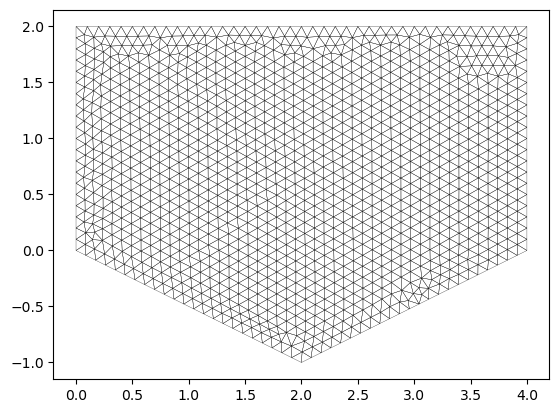

In [17]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
import numpy as np
from numba import njit
import time

def plot_fem_mesh(nodes, elements, linewidth: float = 0.2):
    # print(nodes_x)
    it = 0
    for element in elements:
        x = [nodes[element[0] - 1][0], nodes[element[1] - 1][0], nodes[element[2] - 1][0]]
        y = [nodes[element[0] - 1][1], nodes[element[1] - 1][1], nodes[element[2] - 1][1]]
        # print(x , y)
        plt.fill(x, y, edgecolor='black', linewidth = linewidth, fill=False)
        it += 1

plot_fem_mesh(coords, edof)

In [ ]:
print(f"""x,y""")
for i in reversed( range(346, 414) ):
    print(f"""4.0, [coords[i][1]}""")

# print(f"""x,y""")
# for i in coords:
#     print(f"""[i[0]], [i[1]}""")

x,y
4.0, 0.02898550733272043
4.0, 0.05797101453237097
4.0, 0.08695652178014124
4.0, 0.1159420290146349
4.0, 0.1449275361318307
4.0, 0.1739130433993621
4.0, 0.2028985505204857
4.0, 0.2318840577248099
4.0, 0.2608695648201249
4.0, 0.2898550718777683
4.0, 0.3188405790315758
4.0, 0.3478260863448316
4.0, 0.3768115934578239
4.0, 0.4057971005848797
4.0, 0.434782607713919
4.0, 0.4637681148596735
4.0, 0.4927536220485209
4.0, 0.5217391292235403
4.0, 0.5507246364038245
4.0, 0.5797101435768004
4.0, 0.6086956507865462
4.0, 0.6376811580224346
4.0, 0.6666666651704674
4.0, 0.6956521723238032
4.0, 0.7246376795693747
4.0, 0.753623186745455
4.0, 0.782608693952922
4.0, 0.8115942011729598
4.0, 0.8405797082947906
4.0, 0.8695652154492258
4.0, 0.8985507225733359
4.0, 0.9275362296675903
4.0, 0.9565217368399386
4.0, 0.9855072440039592
4.0, 1.014492751223761
4.0, 1.043478258626149
4.0, 1.072463765998054
4.0, 1.101449273339947
4.0, 1.130434780665027
4.0, 1.159420287994192
4.0, 1.188405795158369
4.0, 1.217391302380

In [ ]:
print(f"""p1,p2,p3""")
for i in edof:
    print(f"""[i[0]], [i[1]], [i[2]}""")

p1,p2,p3
6433, 536, 7343
10457, 429, 11240
7234, 6466, 7235
6465, 6976, 6977
6461, 556, 6499
560, 6467, 6491
575, 6518, 11009
10949, 574, 11010
6954, 573, 11008
429, 6861, 11240
494, 6466, 7234
6465, 509, 6976
6469, 525, 6489
6835, 513, 8395
536, 6433, 11213
449, 6441, 11012
6439, 450, 11011
574, 10949, 11233
6518, 575, 11234
573, 6954, 11235
6488, 486, 6505
504, 6447, 9595
518, 6444, 11013
6468, 6824, 7244
465, 6451, 7002
6499, 556, 11214
560, 6491, 11215
6948, 6470, 9926
6435, 501, 6987
5981, 6849, 6850
571, 9404, 9475
7082, 6039, 7318
8716, 548, 8756
554, 9271, 11019
7066, 6070, 11072
5977, 7029, 7030
5976, 6988, 6989
450, 6439, 11222
6441, 449, 11221
6449, 464, 11020
464, 6449, 7464
489, 11015, 11190
6835, 8395, 11220
499, 6446, 11017
6192, 6939, 9455
6489, 525, 11217
6814, 480, 11070
392, 393, 6978
7131, 516, 11189
6384, 7761, 7762
11015, 489, 11254
9404, 7016, 9475
6444, 518, 11218
6939, 5968, 9455
438, 6485, 9944
439, 6579, 6580
486, 6488, 11236
6447, 504, 11216
7235, 7051, 9565

### Assemble Element Matrices

In [ ]:
def Ke(coords, alpha_x, alpha_y):
    x1 = coords[0,0]
    x2 = coords[1,0]
    x3 = coords[2,0]
    y1 = coords[0,1]
    y2 = coords[1,1]
    y3 = coords[2,1]
    A = 1/2 * np.abs(x1*(y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    M11 = -(alpha_x * (y2 - y3) ** 2  + alpha_y * (x3 - x2) ** 2) / (4 * A)
    M12 = -(alpha_x * (y2 - y3) * (y3 - y1) + alpha_y * (x3 - x2) * (x1 - x3)) / (4 * A)
    M13 = -(alpha_x * (y2 - y3) * (y1 - y2) + alpha_y * (x3 - x2) * (x2 - x1)) / (4 * A)
    M22 = -(alpha_x * (y3 - y1) ** 2 + alpha_y * (x1 - x3) ** 2) / (4 * A)
    M23 = -(alpha_x * (y3 - y1) * (y1 - y2) + alpha_y * (x1 - x3) * (x2 - x1)) / (4 * A)
    M33 = -(alpha_x * (y1 - y2) ** 2 + alpha_y * (x2 - x1) ** 2) / (4 * A)
    return np.matrix(
        [
            [M11, M12, M13],
            [M12, M22, M23],
            [M13, M23, M33]
        ])

In [ ]:
# import pandas as pd
# df_x_y = pd.read_csv("./domains/domain_2/mesh0005_test/mesh_nodes.csv")
# df_z = pd.read_csv("./output/domain_2_extra/mesh0005_test/Test_domain_2_rectangle_dirichlet_only_0005_test_solution.csv")
# df_elements = pd.read_csv("./domains/domain_2/mesh0005_test/mesh_polygons.csv")
# co = coords.copy()
# for i in range(len(df_x_y["x"].values)):
#     co[i][0] = df_x_y["x"].values[i]
#     co[i][1] = df_x_y["y"].values[i]

num_elem = len(edof)
num_nodes = len(dofs)

ke = np.zeros((num_elem, 3, 3))

for i in range(num_elem):
    ke[i] = Ke(coords[edof[i] - 1], 1, 1)


### Assemble Global Matrix

In [ ]:
K = np.zeros((num_nodes, num_nodes))
for e in range(num_elem):
    for i in range(3):
        for j in range(3):
            K[edof[e,i] - 1, edof[e,j] - 1] += ke[e,i,j]

### Create RHS Vector

In [ ]:
b = np.zeros(num_nodes)

### Introduce Boundary Conditions

In [ ]:
for n in reversed (range(len(boundary_voltages))):
    for i in range(len(b)):
        if np.fabs(boundary_voltages[n]) > 1e-16:
            b[i] -= boundary_voltages[n]*K[i, n]
    b = np.delete(b, n, axis=0)
    K = np.delete(K, n, axis=0)
    K = np.delete(K, n, axis=1)

### Solve

In [ ]:
x = np.linalg.solve(K,b)
v = np.zeros(num_nodes-len(x))
v = np.concatenate((boundary_voltages,x))

### Plot

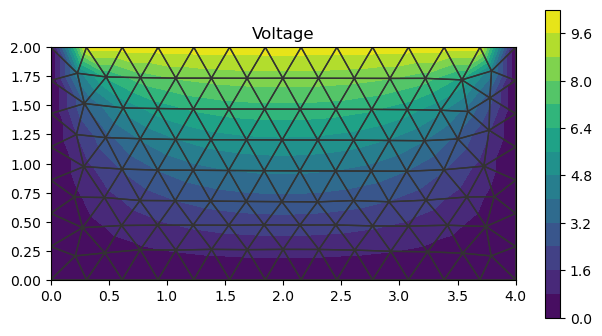

In [ ]:
cfvl.figure(fig_size=(7.5, 4))
cfvl.draw_nodal_values_contourf(v, coords, edof, title="Voltage", dofs_per_node=mesh.dofs_per_node, el_type=mesh.el_type, draw_elements=True)
cfvl.colorbar()

In [ ]:
import pandas as pd
df_x_y = pd.read_csv("./domains/domain_2/mesh005_test/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_2_extra/mesh005_test/Test_domain_2_rectangle_dirichlet_only_005_test_solution.csv")
df_elements = pd.read_csv("./domains/domain_2/mesh005_test/mesh_polygons.csv")
# for element in df_elements.values:
#     element -= 1;

co = coords.copy()
for i in range(len(df_x_y["x"].values)):
    co[i][0] = df_x_y["x"].values[i]
    co[i][1] = df_x_y["y"].values[i]

for k in co:
    print(f"[k[0]], [k[1]}")

cfvl.figure(fig_size=(7.5, 4))
cfvl.draw_nodal_values_contourf(df_z["sol"].values, co, df_elements.values, title="Voltage", dofs_per_node=mesh.dofs_per_node, el_type=mesh.el_type, draw_elements=False)
cfvl.colorbar()


FileNotFoundError: [Errno 2] No such file or directory: './domains/domain_2/mesh005_test/mesh_nodes.csv'

In [ ]:
print(len(v))
print(len(coords))
print(len(edof))

from numba import njit

@njit()
def exact_solution(x, y, row_num_el: int = 50):
    res = 0
    for n in range(1, row_num_el + 1):
        res += 20 * (1 - (-1) ** n) / (np.pi * n) / (np.exp(- np.pi * n / 2 ) - np.exp( np.pi * n / 2 )) * (np.exp(- np.pi * n / 4 * y ) - np.exp( np.pi * n / 4 * y)) * np.sin(np.pi * n / 4 * x)
    if res > 10.:
        res = 10.
    return res

def print_mean_error(x, y ,z):
    error_in_node = [];
    for i in range(len(z)):
        error_in_node.append( np.fabs( z[i] - exact_solution(x[i], y[i]) ))
    print("Mean error: ", round(np.mean(error_in_node), 8))
    print("Max error: ", round(np.max(error_in_node), 8))

    # for i in range(len(error_in_node)):
    #     if error_in_node[i] > 0.2:
    #         print( x[i], y[i], error_in_node[i])



998
998
1874


In [ ]:
x = []
y = []
for i in range(len(coords)):
    x.append(coords[i][0])
    y.append(coords[i][1])


In [ ]:
print_mean_error(x, y, v)

Mean error:  0.00777009
Max error:  0.61644325
